# Linear Regression

## Import necessary modules

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
import sklearn.cluster
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.model_selection

## Load data

In [2]:
df = pd.read_csv("../data/boston_house_prices_processed.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
483,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
484,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
485,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Split data

In [3]:
X = df.drop(columns="MEDV")
Y = df["MEDV"]

## Performance evaluation criteria

In [4]:
def performance_evaluate(Y_true, Y_predicted):
    R2_score = sklearn.metrics.r2_score(Y_true, Y_predicted)
    MSE_score = sklearn.metrics.mean_squared_error(Y_true, Y_predicted)
    MAPE_score = sklearn.metrics.mean_absolute_percentage_error(Y_true, Y_predicted)
    return {"R2": R2_score, "MSE": MSE_score, "MAPE": MAPE_score}

## Train, test split

In [5]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=0
)

## Pairs plot

In [6]:
def pairs_plot(df, line_length=5, kind="scatter"):
    for i in range(0, len(df.columns), line_length):
        sns.pairplot(
            df,
            x_vars=df.columns[i : min(i + line_length, len(df.columns))],
            y_vars="MEDV",
            kind=kind,
        )

### Train set

e:\ProgramFiles\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


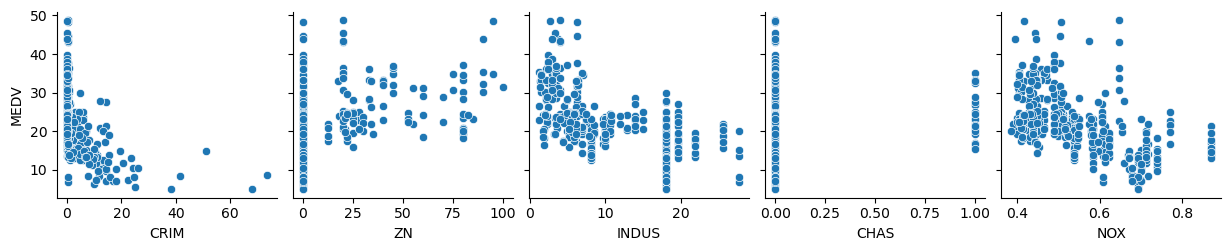

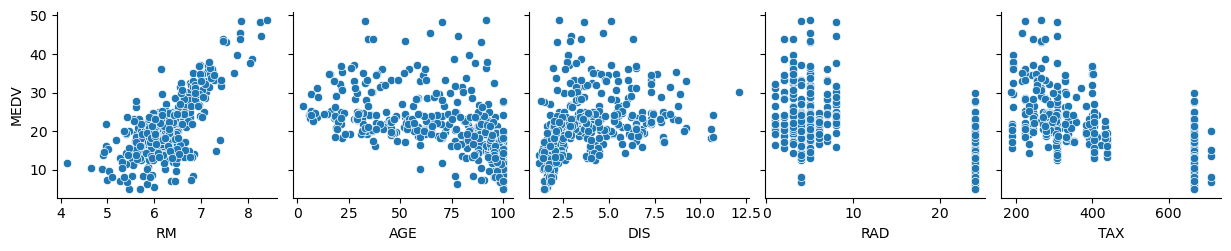

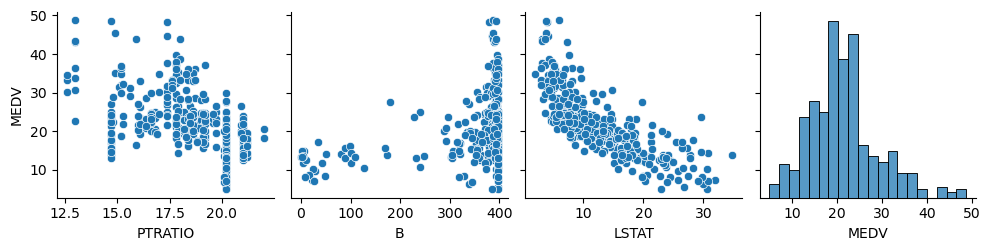

In [7]:
df_train = X_train.copy()
df_train["MEDV"] = Y_train
pairs_plot(df_train)

### Test set

e:\ProgramFiles\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


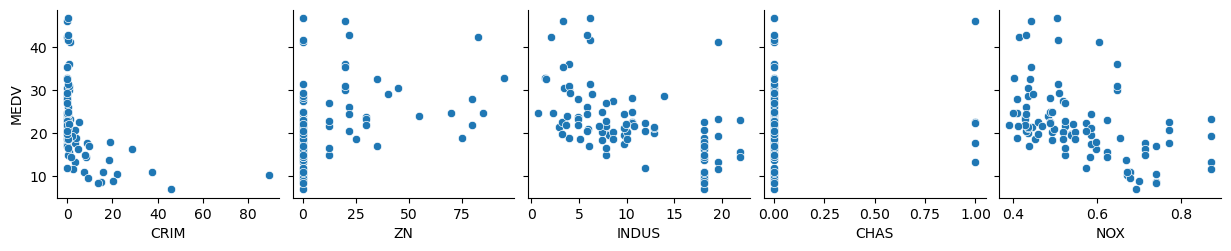

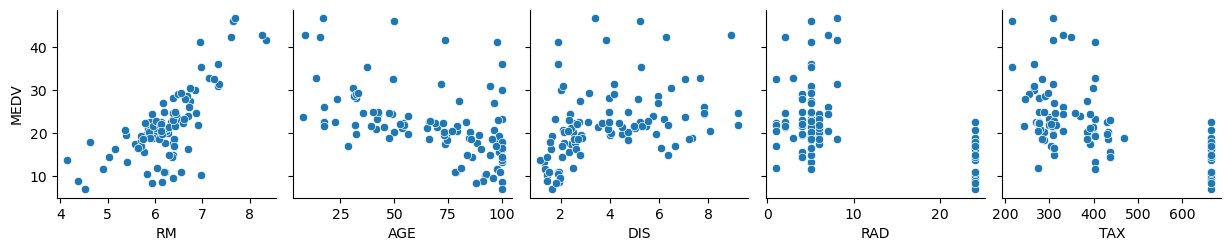

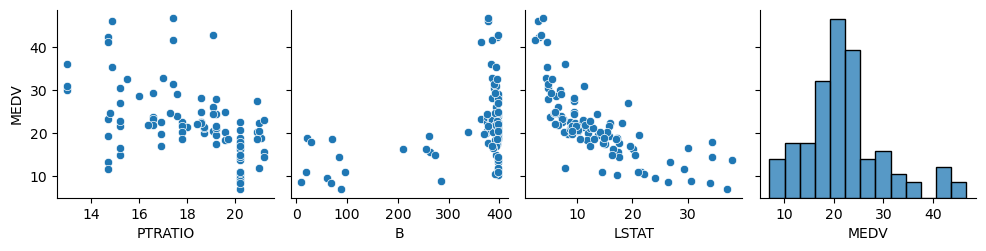

In [8]:
df_test = X_test.copy()
df_test["MEDV"] = Y_test
pairs_plot(df_test)

## Baseline

In [9]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, Y_train)

df_result = pd.DataFrame()
df_result["Metric"] = performance_evaluate(
    np.array([0, 0, 0]), np.array([0, 0, 0])
).keys()

Y_pred = model.predict(X_train)
df_result["Train"] = performance_evaluate(Y_true=Y_train, Y_predicted=Y_pred).values()

Y_pred = model.predict(X_test)
df_result["Test"] = performance_evaluate(Y_true=Y_test, Y_predicted=Y_pred).values()

df_result

,Metric,Train,Test
0,R2,0.824755,0.699862
1,MSE,10.654684,20.041589
2,MAPE,0.135483,0.172430


## Kmeans + Linear Regression

In [10]:
features = list(X.columns)
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_train[features])

Y_train_all = []
Y_train_pred_all = []
Y_test_all = []
Y_test_pred_all = []

for cluster_id in range(kmeans.n_clusters):
    X_train_c = X_train[kmeans.labels_ == cluster_id]
    Y_train_c = Y_train[kmeans.labels_ == cluster_id]

    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train_c, Y_train_c)

    X_test_c = X_test[kmeans.predict(X_test[features]) == cluster_id]
    Y_test_c = Y_test[kmeans.predict(X_test[features]) == cluster_id]

    print(f"cluster_id=={cluster_id}")

    # train prediction
    Y_pred_c = model.predict(X_train_c)
    print(performance_evaluate(Y_true=Y_train_c, Y_predicted=Y_pred_c))

    # extend train results
    Y_train_all.extend(Y_train_c)
    Y_train_pred_all.extend(Y_pred_c)

    # test prediction
    Y_pred_c = model.predict(X_test_c)
    print(performance_evaluate(Y_true=Y_test_c, Y_predicted=Y_pred_c))

    # extend test results
    Y_test_all.extend(Y_test_c)
    Y_test_pred_all.extend(Y_pred_c)


df_result = pd.DataFrame()
df_result["Metric"] = performance_evaluate(
    np.array([0, 0, 0]), np.array([0, 0, 0])
).keys()

Y_pred = model.predict(X_train)
df_result["Train"] = performance_evaluate(
    Y_true=Y_train_all, Y_predicted=Y_train_pred_all
).values()

Y_pred = model.predict(X_test)
df_result["Test"] = performance_evaluate(
    Y_true=Y_test_all, Y_predicted=Y_test_pred_all
).values()

df_result

e:\ProgramFiles\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\ProgramFiles\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


cluster_id==0
{'R2': 0.7445605370328399, 'MSE': 7.843102409638555, 'MAPE': 0.1612789512721917}
{'R2': 0.2104719225514673, 'MSE': 13.96609375, 'MAPE': 0.184430691770795}
cluster_id==1
{'R2': 0.8863766922982146, 'MSE': 5.171856055370689, 'MAPE': 0.07616529142178126}
{'R2': 0.8273571922270839, 'MSE': 9.284281757005752, 'MAPE': 0.10289860322329282}
cluster_id==2
{'R2': 0.6806983274816507, 'MSE': 5.0587634699530275, 'MAPE': 0.13278101570896694}
{'R2': -0.13907217800610638, 'MSE': 20.78175998944397, 'MAPE': 0.2677875522219088}
cluster_id==3
{'R2': 0.8946107716455478, 'MSE': 3.15860985941778, 'MAPE': 0.07010271439928345}
{'R2': 0.6470740168943299, 'MSE': 13.411672984168215, 'MAPE': 0.10761257280695873}
cluster_id==4
{'R2': 0.937548665404718, 'MSE': 3.6225111575586886, 'MAPE': 0.05534764761933007}
{'R2': 0.8563969500452671, 'MSE': 9.792004770313332, 'MAPE': 0.08818156155897677}


,Metric,Train,Test
0,R2,0.915784,0.816893
1,MSE,5.120241,12.226908
2,MAPE,0.093313,0.131842
